## Explore results from runs that have Kv maps inspired in measurements

Compare Tr upwelled, HCW, N^2 and Tr concetration profiles.

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.gridspec as gspec
import numpy as np
import seaborn as sns
import scipy.stats
import pandas as pd

import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import os
import sys
import warnings
warnings.filterwarnings("ignore")

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
grid_file1 = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/gridGlob.nc'
state_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/stateGlob.nc'

with Dataset(grid_file1, 'r') as nbl:
    Z1 = nbl.variables['RC'][:]
with Dataset(grid_file2, 'r') as nbl:
    Z2 = nbl.variables['RC'][:]
    hfac = nbl.variables['HFacC'][:,:,:]
with Dataset(state_file2,'r') as stfl:
    time = stfl.variables['T'][:]
    
nx = 616
ny = 360
nz = 90

In [3]:
class run:
        pass
    
CNTDIFF_run38 = run()
VISC3D_run06 = run()
VISC3D_run05 = run()
VISC3D_run03 = run()
VISC3D_REALISTIC_run01 = run()
VISC3D_REALISTIC_run02 = run()
VISC3D_REALISTIC_run03 = run()
VISC3D_REALISTIC_run04 = run()
VISC3D_REALISTIC_run05 = run()
VISC3D_REALISTIC_run06 = run()

records = [ CNTDIFF_run38 ,
            VISC3D_run06 ,
            VISC3D_run05 ,
            VISC3D_run03 ,
            VISC3D_REALISTIC_run01 ,
            VISC3D_REALISTIC_run03 ,
            VISC3D_REALISTIC_run04 ,
            VISC3D_REALISTIC_run02 ,
            VISC3D_REALISTIC_run05 ,
            VISC3D_REALISTIC_run06 ,
           ]

records_nobase = [ VISC3D_run06 ,
                  VISC3D_run05 ,
                  VISC3D_run03 ,
                  VISC3D_REALISTIC_run01 ,
                  VISC3D_REALISTIC_run03 ,
                  VISC3D_REALISTIC_run04 ,
                  VISC3D_REALISTIC_run02 ,
                  VISC3D_REALISTIC_run05 ,
                  VISC3D_REALISTIC_run06 ,
                 ]
names = ['CNTDIFF_run38', '3DVISC_run06','3DVISC_run05',  '3DVISC_run03',
         '3DVISC_REALISTIC_run01','3DVISC_REALISTIC_run03','3DVISC_REALISTIC_run02',
         '3DVISC_REALISTIC_run04','3DVISC_REALISTIC_run05','3DVISC_REALISTIC_run06']
exps = ['CNTDIFF', '3DVISC', '3DVISC', '3DVISC','3DVISC_REALISTIC', '3DVISC_REALISTIC', 
        '3DVISC_REALISTIC','3DVISC_REALISTIC', '3DVISC_REALISTIC', '3DVISC_REALISTIC']
runs= ['run38', 'run06', 'run05', 'run03', 'run01', 'run03','run02', 'run04', 'run05', 'run06']
labels = [r'base',r'$K_{can}=10^{-2}$ $m^2$s$^{-1}$',r'$K_{can}=5\times10^{-2}$ $m^2$s$^{-1}$',
          '$K_{can}=10^{-3}$ $m^2$s$^{-1}$', '$K_{Mty}$', '$K_{Mty} rim$',
          '$K_{Eel}$', '$K_{Eel}$ rim','$K_{Asc}$', '$K_{Asc}$ rim']
colors = ['black', 'kelley green','leaf green', 'olive', 'cerulean','sky blue','purple','orchid','cherry', 'salmon']
Zs = [Z1, Z1, Z1,Z1, Z2, Z2, Z2,Z2, Z2, Z2]


for rec, name, exp, runnum, col, lab, Z in zip(records,names,exps,runs,colors,labels, Zs):
    rec.name = name
    rec.exp = exp
    rec.run = runnum
    rec.color = col
    rec.label = lab
    rec.Z = Z

### HCW and Tracer upwelled

In [4]:
for ii in range(len(records)):

    file = ('/data/kramosmu/results/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ii].exp,
                                                                                records[ii].exp,
                                                                                records[ii].run))
    print(file)
    dfcan = pd.read_csv(file)
    records[ii].HCW = dfcan['HCW']
    records[ii].TrMass = dfcan['TrMassHCW']
    records[ii].TrMassTot = dfcan['TotTrMass'] 

/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun06.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun05.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun03.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun01.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun03.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun02.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun04.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun05.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun06.csv


Text(0.5,1,'Total tracer mass on shelf')

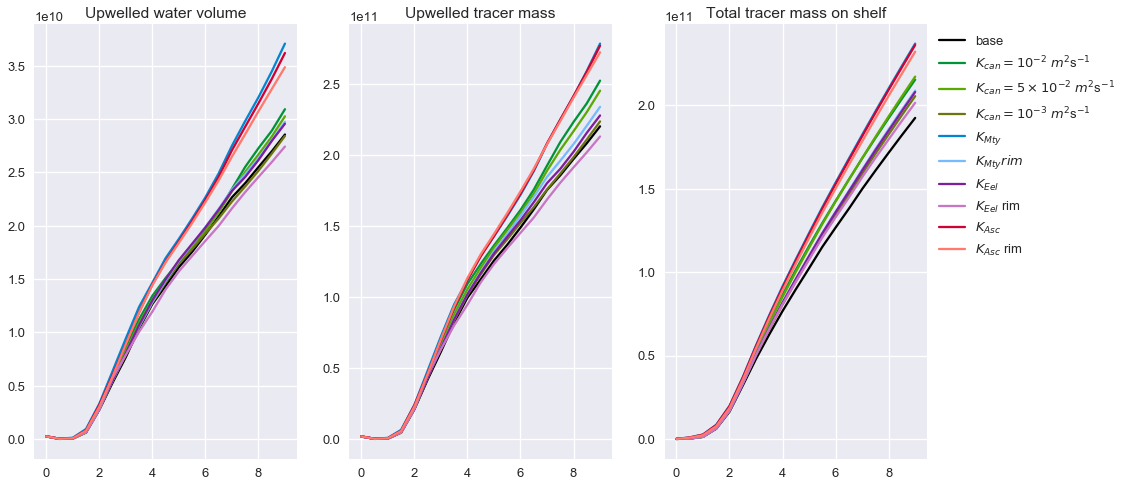

In [5]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(16,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[2].plot(np.arange(19)/2,rec.TrMassTot-rec.TrMassTot[0], color=sns.xkcd_rgb[rec.color], label=rec.label)
    
    rec.Phi = np.mean(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.Phi_std = np.std(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
    rec.PhiTr = np.mean(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.PhiTr_std = np.std(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
ax[2].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[2].set_title('Total tracer mass on shelf')

Text(0,0.5,'Tracer Mass / $10^{11}$ $\\mu$Mm$^3$')

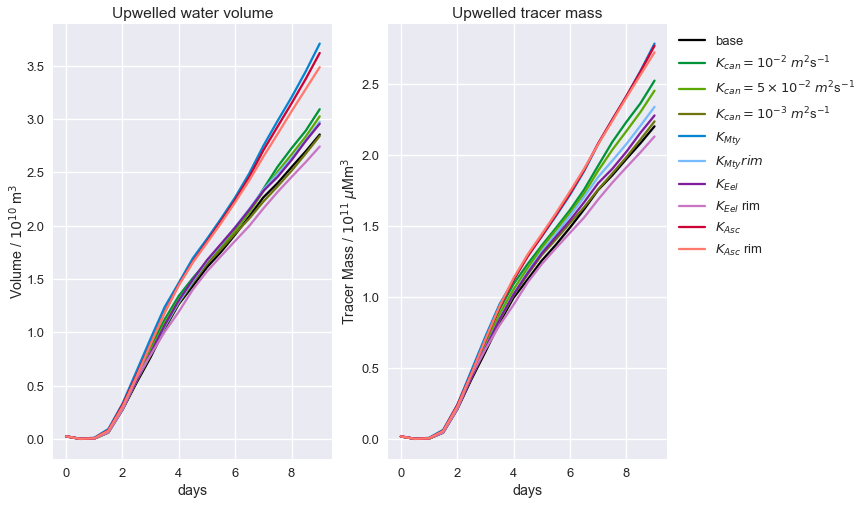

In [6]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(11,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW/1E10, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass/1E11, color=sns.xkcd_rgb[rec.color], label=rec.label)
    
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[0].set_xlabel('days')
ax[1].set_xlabel('days')
ax[0].set_ylabel(r'Volume / $10^{10}$ m$^3$', labelpad=0.5)
ax[1].set_ylabel(r'Tracer Mass / $10^{11}$ $\mu$Mm$^3$', labelpad=0.5)

#plt.savefig('canyon_upwelling_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

It looks like there are well-defined timescales in which the effect of kv can be seen on the volume of upwelled water and tracer. For example, in the $\Phi$ plot, Mty, Asc and Asc rim separate from the other runs around day 2.5. At day 7, Mty, Asc and Asc rim spread away from each other while locally-enhanced kv runs 10^-2 and 5x10^-3 spread from the base case a bit earlier - around day 6.

### Stratification and tracer gradient

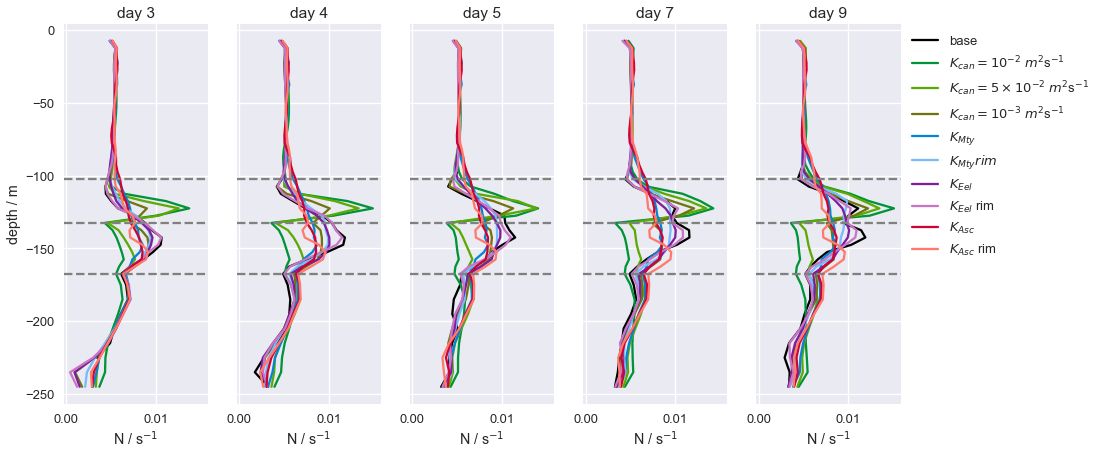

In [39]:
keys = ['N_tt06','N_tt08','N_tt10','N_tt14','N_tt18']
keys2 = ['N_tt08']

days = ['3','4','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    Nhd = 0
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
    
    for key,ii in zip(keys2, range(len(keys2))):
        Nhd = Nhd + np.mean(df[keys2[ii]][25:28])
    rec.Nhd = Nhd/  len(keys2)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[20],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[33],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


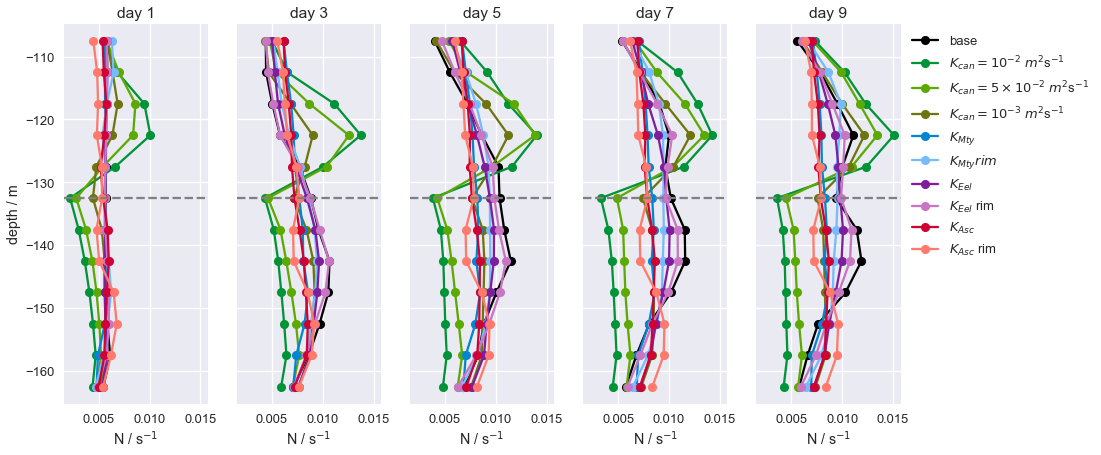

In [8]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[21:33],'-o', color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


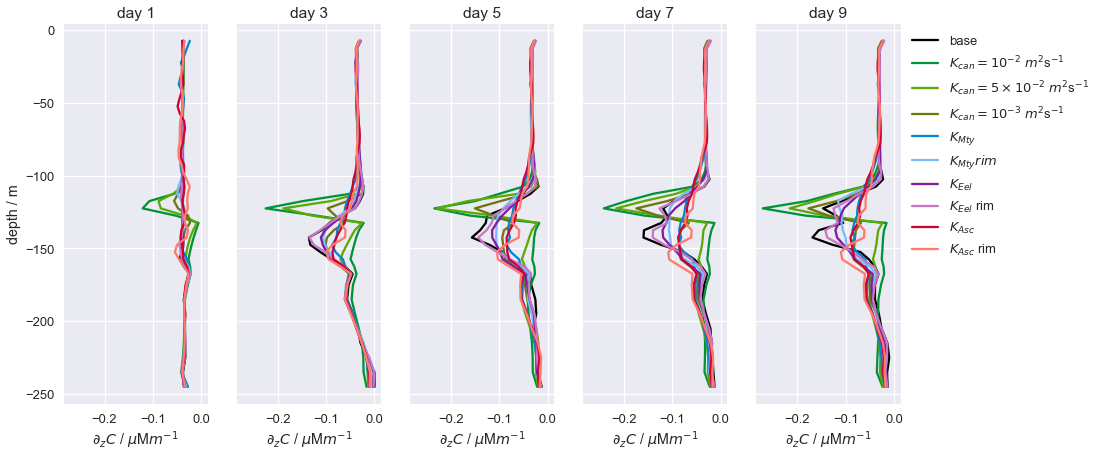

In [9]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



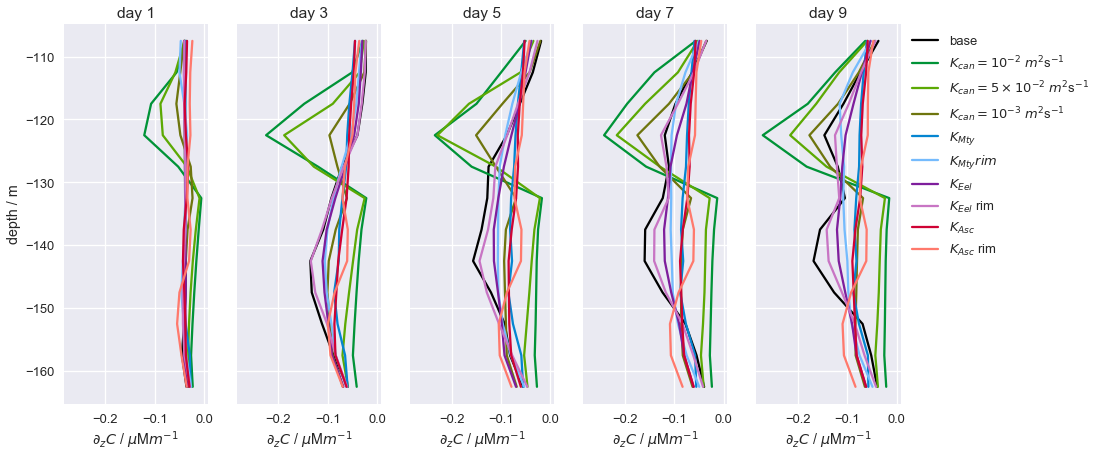

In [10]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[21:33], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



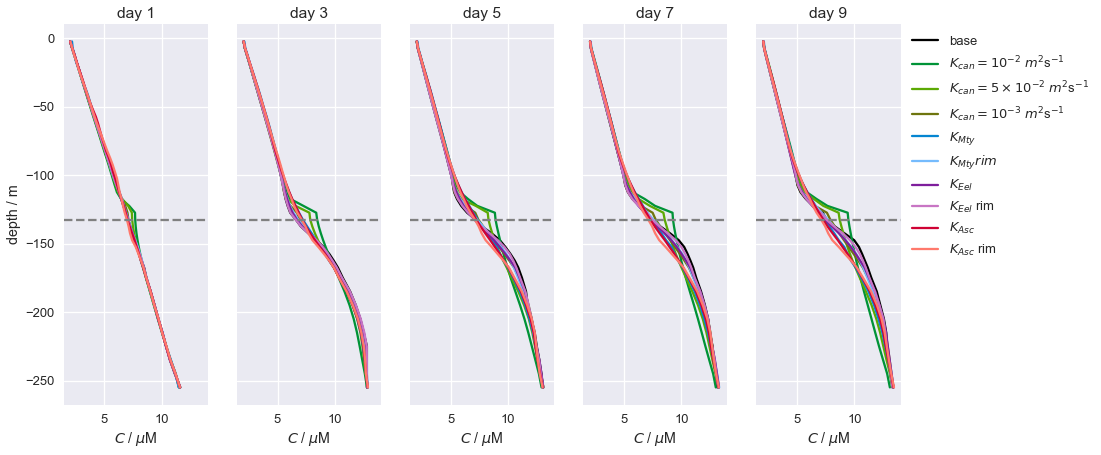

In [11]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    Crim = 0
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],rec.Z[:], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        Crim = Crim + df[keys[ii]][26]
    rec.Crim = Crim /  len(keys)

for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

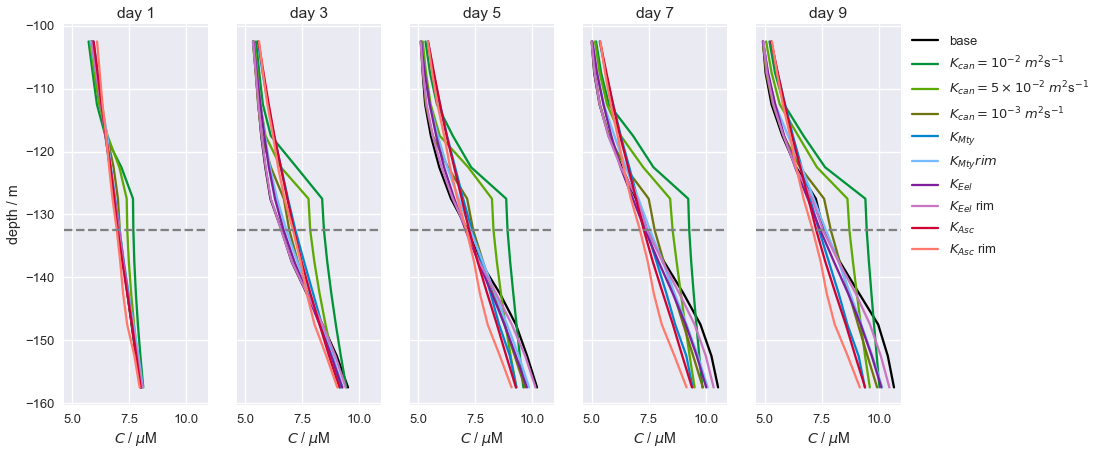

In [12]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (rec.name,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],rec.Z[20:32], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

CNTDIFF_run38 0.0 0.0
3DVISC_run06 8.12984800183 16.8664908686
3DVISC_run05 6.91917172334 14.6976760721
3DVISC_run03 -2.19160090733 0.809345365962
3DVISC_REALISTIC_run01 38.4215028356 35.3405552211
3DVISC_REALISTIC_run03 5.89578773725 8.82055678633
3DVISC_REALISTIC_run02 4.49953347068 4.53482671067
3DVISC_REALISTIC_run04 -2.03950368645 -1.36211953536
3DVISC_REALISTIC_run05 34.6901466995 34.6283411933
3DVISC_REALISTIC_run06 28.4304914939 31.4479484192


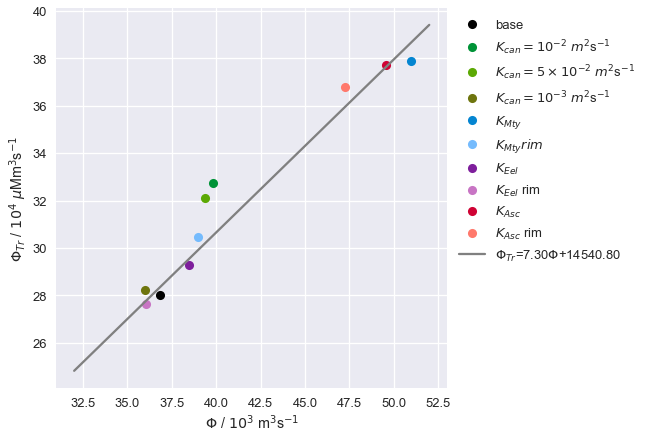

In [13]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

rec0 = records[0] # base case
for rec in records:
    #ax.errorbar(rec.Phi, rec.PhiTr, xerr=rec.Phi_std,yerr=rec.PhiTr_std, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax.plot(rec.Phi/1E3, rec.PhiTr/1E4,'o', color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.Phi_inc = 100*((rec.Phi-rec0.Phi)/rec0.Phi) 
    rec.PhiTr_inc = 100*((rec.PhiTr-rec0.PhiTr)/rec0.PhiTr) 
    print(rec.name,rec.Phi_inc,rec.PhiTr_inc)
ax.set_ylabel(r'$\Phi_{Tr}$ / $10^4$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')


# Fit line using only realistic Kv cases
records_NoKv = [records[0],records[4],records[5],records[6],records[7],records[8],records[9]]
Phi_array = np.array([rec.Phi for rec in records_NoKv])
PhiTr_array = np.array([rec.PhiTr for rec in records_NoKv])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Phi_array,PhiTr_array)

ax.plot(np.linspace(32000,52000,100)/1E3,((slope*np.linspace(32000,52000,100))+intercept)/1E4, 
        color='0.5', label = r'$\Phi_{Tr}$=%1.2f$\Phi$+%1.2f' %(slope,intercept))

ax.legend(bbox_to_anchor=(1,1))    


* The Monterey bottom-normalized Kv profile increases the water flux by 38.42% and tracer flux by 35.34% with respect to the base case.
* Ascension profiles increase tracer upwelling flux by 28% (rim) and 34% (bottom).
* Tracer flux is linearly proportional to water flux for realistic profiles; step Kv profiles seem to be outliers.
* This suggests that the increase in tracer flux is caused by the decrease in stratification due to realistic profiles that increases the water flux.
* Water flux is also larger in cases with a step kv profile (8.13% to 6.91%) but it is not the only thing causing an increase in tracer flux (the increase seems larger than expected from the realistic cases, 16.8% to 14.5%, double the increase in $\Phi$).The extra increase caused by an increase in concentration near the rim.


### Plot Kv initial profiles (From IC files)

In [14]:
kv_dir = '/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/'
ini_kv_files = [kv_dir + 'KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff1E_5_5E_3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff1E_5_1E_3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Mty_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Mty_rim_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Eel_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Eel_rim_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Asc_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_Asc_rim_90zlev_616x360_Quad.bin']

dt = np.dtype('>f8')  # float 64 big endian
DnS = [245, 200] # y, x indices of DnS station

ini_kv_profiles = np.zeros((len(ini_kv_files),nz))

for file, ii in zip(ini_kv_files, range(len(ini_kv_files))):
    data = np.fromfile(file, dt)
    print(file)
    ini_kv = np.reshape(data,(nz,ny,nx),order='C')
    ini_kv_profiles[ii,:] = ini_kv[:, DnS[0], DnS[1]] 

/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_5E_3_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_1E_3_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Mty_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Mty_rim_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Eel_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Eel_rim_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Asc_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_Asc_rim_90zlev_616x360_Quad.bin


Text(0.009,15,'Initial $K_v$ profiles')

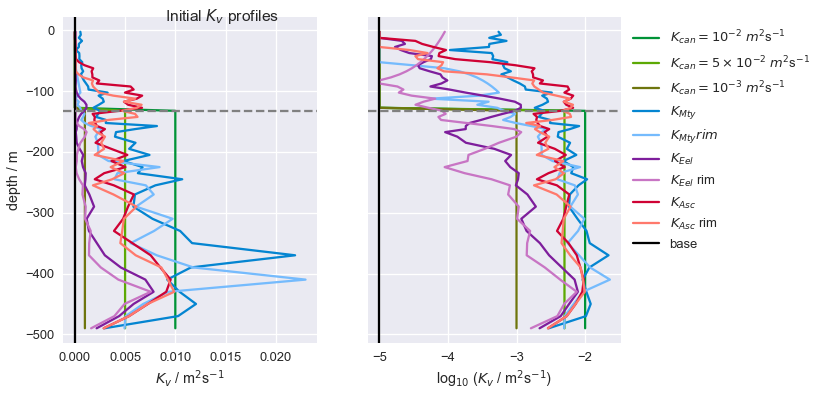

In [60]:
fig,ax = plt.subplots(1, 2,figsize = (10,6), sharey = True )

for ii, rec in zip(range(len(ini_kv_files)), records_nobase):
    ax[0].plot(ini_kv_profiles[ii,:55], rec.Z[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.log10(ini_kv_profiles[ii,:55]), rec.Z[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.kv_rim = np.mean(ini_kv_profiles[ii,25:28])
    rec.kv_bg = np.mean(ini_kv_profiles[ii,18])
    rec.kv_can = np.mean(ini_kv_profiles[ii,26])
 
rec0.kv_rim = 1E-5 
rec0.kv_bg = 1E-5 
rec0.kv_can = 1E-5 
ax[0].axvline(1E-5, color='k', label='base')    
ax[1].axvline(-5, color='k', label='base')    
ax[0].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_xlabel('$K_v$ / m$^2$s$^{-1}$')
ax[1].set_xlabel('log$_{10}$ ($K_v$ / m$^2$s$^{-1}$)')
ax[0].set_ylabel('depth / m')
ax[0].text(0.009, 15, r'Initial $K_v$ profiles')

From this plot and the one before:
* Runs with larger Kv at the rim have larger upwelling fluxes (except for the Kv step profiles)
* $\Phi$ for the base case is very similar to Eel rim, which has almost 10 times more diffusivity and I would expect to be a lot larger than the base case. ($10^{-5}$ vs $10^{-4}$ m$^2$s$^{-1}$).
* Rim-normalized runs have lower $\Phi$ than bottom-normalized runs, why? For Eel and Ascension, rim-normalized profiles have a deeper belly of higher Kv than bottom-normalized profiles. Monterey bottom is just higher than Monterey rim everywhere above 200 m.
    
Maybe, there is not much difference between $10^{-5}$ m$^2$s$^{-1}$ and $10^{-4}$ m$^2$s$^{-1}$ for the model or not enough time to see its effects...

### Find the N, Kv that matters


3DVISC_run06, 1.00e-02, 1.00e-05
3DVISC_run05, 5.00e-03, 1.00e-05
3DVISC_run03, 1.00e-03, 1.00e-05
3DVISC_REALISTIC_run01, 2.54e-03, 1.32e-03
3DVISC_REALISTIC_run03, 6.63e-04, 4.37e-04
3DVISC_REALISTIC_run02, 9.40e-04, 5.56e-05
3DVISC_REALISTIC_run04, 8.25e-05, 1.84e-05
3DVISC_REALISTIC_run05, 4.41e-03, 5.55e-03
3DVISC_REALISTIC_run06, 4.73e-03, 1.82e-03


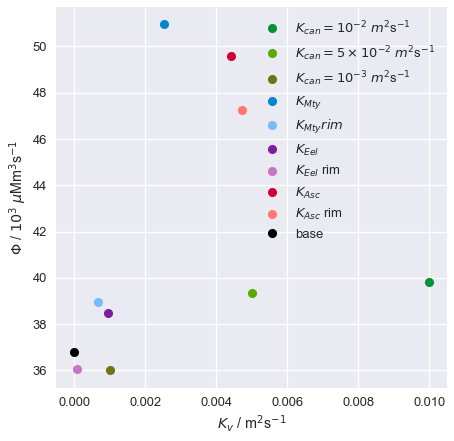

In [61]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

rec0 = records[0] # base case
rec0.kv_rim = 1E-5
for rec in records[1:]:
    ax.plot((rec.kv_can),rec.Phi/1E3,'o', color=sns.xkcd_rgb[rec.color], label=rec.label)
    print('%s, %1.2e, %1.2e' %(rec.name, rec.kv_can, rec.kv_bg))
ax.plot((rec0.kv_can-rec0.kv_bg),rec0.Phi/1E3,'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)

ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$K_v$ / m$^2$s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    


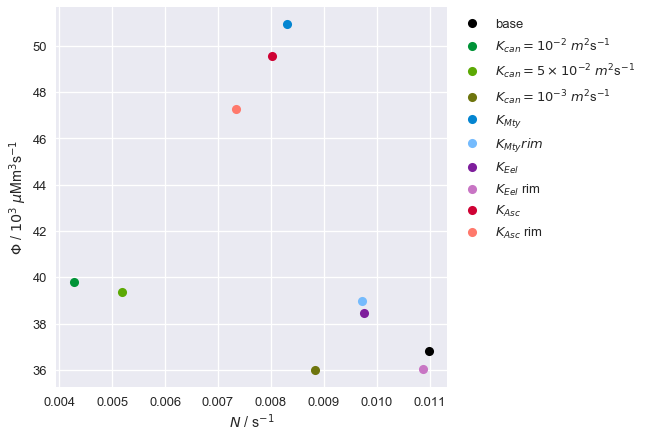

In [57]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.plot((rec.Nhd),rec.Phi/1E3,'o', color=sns.xkcd_rgb[rec.color], label=rec.label)

ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$N$ / s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    
